# Python For Finance: Analyzing Coca- Cola

In this notebook we will be analyzing Coca-Cola's stock information using Pandas and Matplotlib. The purpose of this notebook is to use the most basic parts of data analysis libraries in Python, including how to use an API to pull financial data from the internet and performing basic analysis and graphing on them. 

First of all, we will have to import some Python libraries that are relevant to our project.

In [1]:
import datetime as dt 
import matplotlib.pyplot as plt 
from matplotlib import style 
import pandas as pd 
import pandas_datareader.data as web

Here we have imported matplotlib and pandas for our data analysis and graphing purposes. "datetime" is used to process our dates within pandas API so that we can specify the timeline of the data that we want to analyze. 

Now, we will specify the "style" of our matplotlib graph as well as set the dates of our stock data:

In [2]:
style.use('ggplot')

# We will start pulling data from January 1st, 2017 until the current date

start = dt.datetime(2017,1,1)
end = dt.datetime.now() 

Next, we will pull Coca-Cola's stock information from the pandas API. In order to make things simple, we will save the data into a CSV file so that the next time we run the program (for whatever purposes) we no longer have to pull the data from the API, which can save us some time. We will be pulling data from Morningstar.

In [5]:
df = web.DataReader('KO', 'morningstar', start, end)

# Save data to CSV 

df.to_csv('KO.csv')

Next, we will read the data from the CSV file we just created. We will start from the 0th index (column titles) and parse the data using the dates.

In [15]:
df = pd.read_csv('KO.csv', parse_dates = True, index_col = 0)

We can see what the data looks like using .head(). This shows us the first 5 rows of the dataframe. If you want to see the last 5 rows (most recent), you can use .tail(). 

In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,41.500000,41.810001,41.279999,41.799999,40.086254,14711000
2017-01-04,41.880001,41.970001,41.590000,41.650002,39.942406,9959400
2017-01-05,41.660000,41.860001,41.529999,41.750000,40.038300,8968300
2017-01-06,41.700001,41.810001,41.540001,41.740002,40.028717,10246600
2017-01-09,41.230000,41.580002,41.209999,41.320000,39.625935,14800400


In order to see what matplotlib is capable of, we will graph one column of the data (Close price) and show them here in this notebook. 

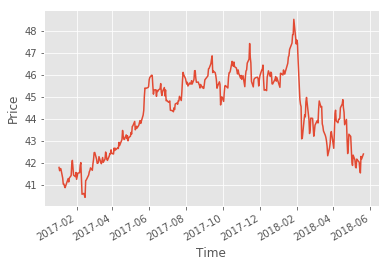

In [17]:
df['Close'].plot()

plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

We can also plot multiple variables (columns) using maptlotlib. All we have to do is add the column names inside the dataframe list.

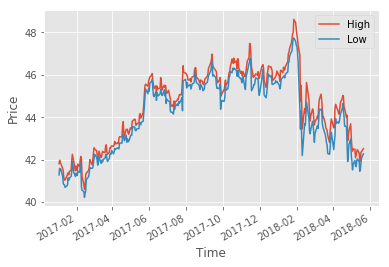

In [18]:
df[['High', 'Low']].plot() # Double list brackets for multiple variables

plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In addition to using pandas API to pull data from the web, we can also add our own columns containing a new data that we want (called feature engineering). In this example, we will add a column containing the 100-day moving average. 

In [21]:
df['100 ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()

df.head() # Let's check the data

,Open,High,Low,Close,Adj Close,Volume,100 ma
Date,,,,,,,
2017-01-03,41.500000,41.810001,41.279999,41.799999,40.086254,14711000,40.086254
2017-01-04,41.880001,41.970001,41.590000,41.650002,39.942406,9959400,40.014330
2017-01-05,41.660000,41.860001,41.529999,41.750000,40.038300,8968300,40.022320
2017-01-06,41.700001,41.810001,41.540001,41.740002,40.028717,10246600,40.023919
2017-01-09,41.230000,41.580002,41.209999,41.320000,39.625935,14800400,39.944322


In this example, we set min_periods = 0 to avoid having N/A values, since < 100 days (in our CSV file) we will not have enough data to compute the 100-day average.

Now we can create even more complicated graphs in matplotlib using what we call "subplots". In this example, We create 2 subplots on a 6 x 1 matrix. The first subplot is a 5 x 1 and starts from the point (0,0), while the second subplot is a 1 x 1 and starts from the point (5,0). Both subplots will share the same x-axis. 

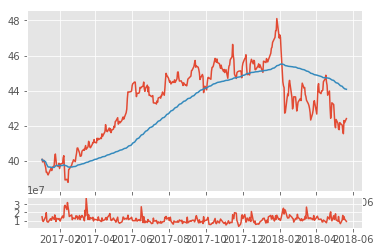

In [22]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1) # Share the same x-axis

# Plotting the graph 

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100 ma']) # Plot closing price and 100-MA on the 5x1
ax1.xaxis_date()
ax2.plot(df.index, df['Volume']) # Plot the volume on the 1x1

plt.show()

This graph looks familiar to what we see in trading platforms. Finally, in order to make it look better we will re-graph the data using a candlestick chart. In order to do that we will first have to import some more libraries from matplotlib.

In [23]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

Next, we resample the data with a 10-day window. Note that this is the 10-day average, not the ROLLING average, and the purpose is that since our data is daily, resampling it into a 10-day average effectively shrinks our data significantly. 

In [24]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.head() # Let's check the data 

,open,high,low,close
Date,,,,
2017-01-03,40.086254,40.086254,39.271107,39.271107
2017-01-13,39.203972,39.625935,39.203972,39.625935
2017-01-23,39.731419,40.393135,39.568390,39.568390
2017-02-02,39.702656,40.297234,38.916275,38.916275
2017-02-12,38.954632,39.760189,38.782013,39.760189


Since we just want to graph the columns onto matplotlib, we don't actually want the dates to be an index anymore. To remove it, all we have to do is:

In [25]:
df_ohlc = df_ohlc.reset_index()

Now that dates is just another regular column, we will convert it:

In [26]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

Finally, we use the same method of creating subplots that we did before. This time, we specify the color of each candlestick and perform other slight variations to our graph.

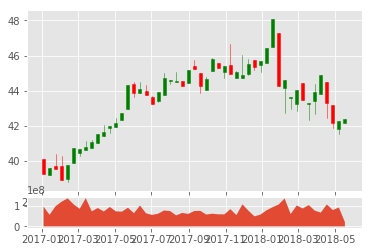

In [28]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

©Regio Ricco Abundan. May 28th, 2018